In [113]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

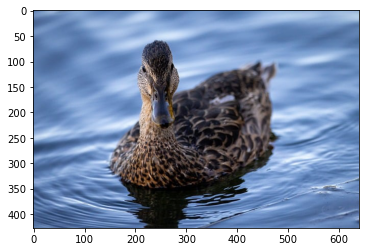

In [114]:
im = read_im(pathlib.Path("images", "duck.jpeg"))
# im = read_im(pathlib.Path("image_solutions", "duck_greyscale.jpeg"))
# im = read_im(pathlib.Path("images", "test.png"))
# im = read_im(pathlib.Path("images", "testEinstein.jpg"))
plt.imshow(im)

In [115]:
def convolve_im(im, kernel,
    ):
    """ A function that convolves im with kernel
    
    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    assert len(im.shape) == 3

    H, W, D = im.shape
    K, K2 = kernel.shape

    assert K==K2
    assert (K % 2) == 1

    f_kernel = np.fliplr(np.flipud(kernel))

    center_index = int(np.floor(K/2)) 

    sol = np.zeros(im.shape)
    dummy = np.zeros((H + 2*center_index, W + 2*center_index, D))
    dummy[center_index:-center_index,center_index:-center_index, :] = im

    for i in range(H):
        for j in range(W):
            for d in range(D):
                # sol[i][j][d] = np.sum(dummy[i:i+K, j:j+K, d] * kernel)
                sol[i][j][d] = np.sum(dummy[i:i+K, j:j+K, d] * f_kernel)
    return sol


In [116]:
# Define the convolutional kernels
h_b = 1 / 256  * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

laplace = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

constant = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

blurring = 1/9 * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

# Convolve images
im_smoothed = convolve_im(im.copy(), h_b)
save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
im_sobel = convolve_im(im, sobel_x)
save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),     f"Your convolve function has to return a np.array. " +    f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == im.shape,     f"Expected smoothed im ({im_smoothed.shape}" +     f"to have same shape as im ({im.shape})"
assert im_sobel.shape == im.shape,     f"Expected smoothed im ({im_sobel.shape}" +     f"to have same shape as im ({im.shape})"

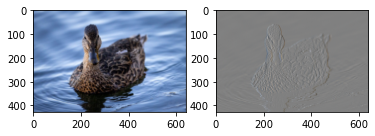

In [117]:
plt.subplot(1, 2, 1)
plt.imshow(normalize(im_smoothed))

plt.subplot(1, 2, 2)
plt.imshow(normalize(im_sobel))
plt.show()